___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8


#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Описова статистика

In [14]:
df = pd.read_csv('groceries.csv')
df.head(5)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(9835, 33)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [17]:
df.drop(['Item(s)'], axis=1, inplace = True)

In [18]:
df.shape

(9835, 32)

## Топ-3 продукти

In [19]:
elements = []

for i in range(0, 9835):
    for j in range(0, 32):
        elements.append(str(df.values[i,j])) 


elements_clear = [x for x in elements if x != 'nan']

In [20]:
from collections import Counter

In [21]:

counter = Counter(elements_clear)
top_3 = counter.most_common(3)

print("Топ-3 наиболее встречаемых элемента:", top_3)

Топ-3 наиболее встречаемых элемента: [('whole milk', 2513), ('other vegetables', 1903), ('rolls/buns', 1809)]


## Топ-2 пари

In [22]:
rows = []

for i in range(0, 9835):
    rows.append([str(df.values[i,j]) for j in range(0, 32)])

In [23]:
rows_clear = []

for row in rows:
    rows_clear.append([i for i in row if i != 'nan'])

In [24]:
from apyori import apriori

In [25]:
model = apriori(rows_clear, min_support=0.0045, min_confidence=0.2, min_lift=3)

In [26]:
rules = []
supports = []
confidences = []
lifts = []

for item in model:
    pair = item[0] 
    items = [x for x in pair]

    rule = items[0] + " -> " + items[1]
    rules.append(rule)

    support = item[1]
    supports.append(support)

    confidence = item[2][0][2]
    confidences.append(confidence)

    lift = item[2][0][3]
    lifts.append(lift)
    
dict = {
    'Rule': rules,
    'Support': supports,
    'Confidence': confidences,
    'Lift': lifts
}

In [27]:
result = pd.DataFrame(dict)

### За показником lift, що відповідає за силу зв'язності пари

In [28]:
result.sort_values(by=['Lift'], ascending=False).head(2)

,Rule,Support,Confidence,Lift
5,flour -> sugar,0.004982,0.286550,8.463112
57,root vegetables -> yogurt,0.004982,0.236715,5.452206



- Бачимо, що цукор+борошно дуже часто продається разом, проте сама ця комбінація зустрічається лише в 0.5% покупок, що логічно, адже це продукти, які закінчуються рідко і є обов'язковими інгрідієнтами для низки страв.
- Тропічні фрукти і йогурт - основа для інстаграмних сніданків, тому і продаються разом, проте рідко зустрічаються на касі, бо зазвичай люди обирають більш поживний сніданок.

Ідея для тропічних фруктів: ввечері, коли люди роблять собі покупки на завтра, знизити ціни на комбо йогурт+тропічні фрукти+якісь мюслі, щоб покупці могли отримати готові смузі боли, а магазин швидко позбавитися від затяжної продукцій (тропічні фрукти повільно продаються та швидко втрачають товарний вигляд)

### За показником support, що відповідає за частоту зустрічань пари

In [29]:

result.sort_values(by=['Support'], ascending=False).head(2)

,Rule,Support,Confidence,Lift
1,beef -> root vegetables,0.017387,0.331395,3.040367
37,root vegetables -> tropical fruit,0.012303,0.342776,3.144780


- Бачимо, що корневі овочі продаються з м'ясом, що логічно, адже це є основою правильного та ситного харчування. Ця пара продається частіше за інших. Проте в неї не такий гарний показник зв'язності - 3. 

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# K MEANS

## БЕЗ СТАНДАРТИЗАЦІЇ

### Первинна візуалізація

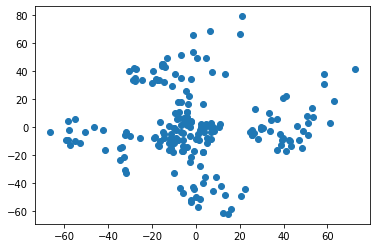

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dum)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.show()

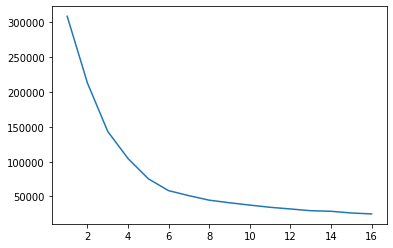

In [10]:
from sklearn.cluster import KMeans

k = []
metrics = []

for i in range(1, 17):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_dum)

    k.append(i)
    metrics.append(kmeans.inertia_)

plt.plot(k, metrics)

Є сенс розглядати 5-8 кластерів

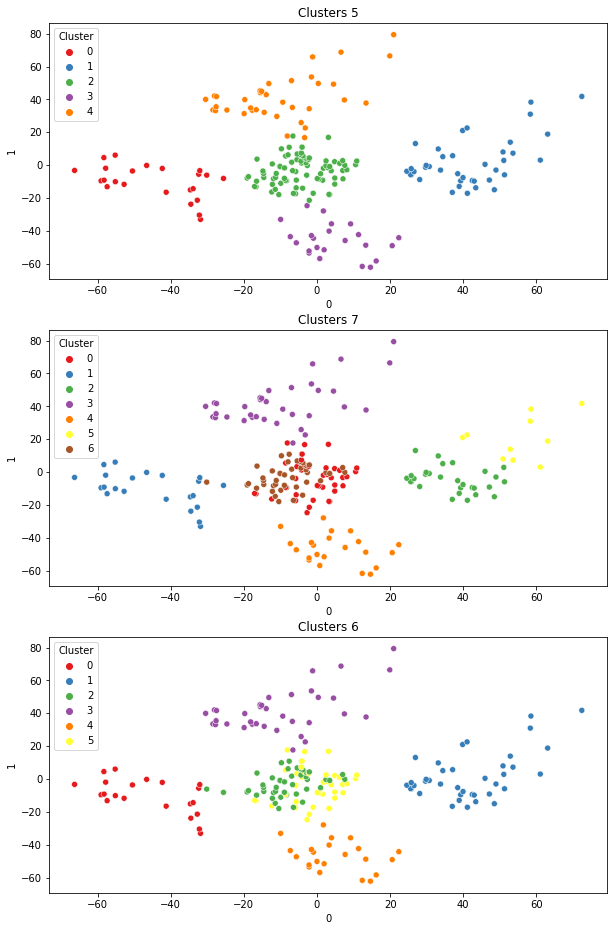

In [18]:
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 16))

model_name = []
silhouettes = []
calinskies = []

for i in range(5, 8):

    model_k_means = KMeans(n_clusters=i)
    model_k_means.fit(df_dum)
    model_name.append(f'K_means {i}')

    silhouette = silhouette_score(df_dum, model_k_means.labels_)
    silhouettes.append(silhouette)
    calinski = calinski_harabasz_score(df_dum, model_k_means.labels_)
    calinskies.append(calinski)


    #візуалізація

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_dum)

    data = pd.DataFrame(df_pca)
    data['Cluster'] = model_k_means.labels_

    sns.scatterplot(data=data, x=0, y=1, hue='Cluster', palette='Set1', ax = axes[(5-i)])
    
    axes[(5-i)].set_title(f'Clusters {i}')

In [23]:
result_1 = pd.DataFrame({'name': model_name,
                       'calin': calinskies,
                       'silh': silhouettes})
result_1

,name,calin,silh
0,K_means 5,150.946316,0.444067
1,K_means 6,166.583496,0.452055
2,K_means 7,162.132917,0.440965


### Краще за все впоралася модель з 6 кластерами

## З СТАНДАРТИЗАЦІЄЮ

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_dum_s = scaler.fit_transform(df_dum)
df_dum_s = pd.DataFrame(df_dum_s)
df_dum_s.head(5)

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


## Первинна візуалізація

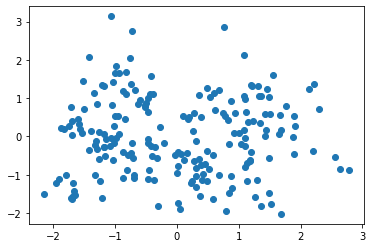

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dum_s)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.show()

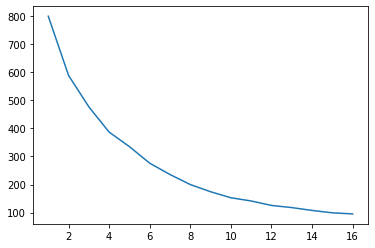

In [14]:
from sklearn.cluster import KMeans

k = []
metrics = []

for i in range(1, 17):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_dum_s)

    k.append(i)
    metrics.append(kmeans.inertia_)

plt.plot(k, metrics)

#### Є сенс брати 5-8 кластерів

### Візуалізація для k-means

In [15]:
import seaborn as sns

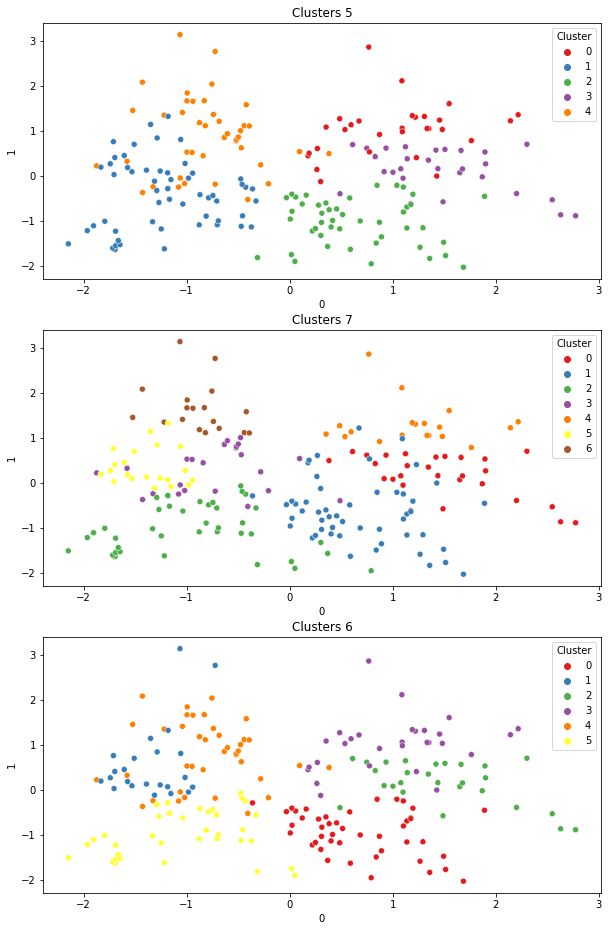

In [24]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 16))

model_name = []
silhouettes = []
calinskies = []


for i in range(5, 8):
    model_k_means = KMeans(n_clusters=i)
    model_k_means.fit(df_dum_s)
    model_name.append(f"K means {i}")

    silhouette = silhouette_score(df_dum_s, model_k_means.labels_)
    silhouettes.append(silhouette)
    calinski = calinski_harabasz_score(df_dum_s, model_k_means.labels_)
    calinskies.append(calinski)

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_dum_s)

    data = pd.DataFrame(df_pca)
    data['Cluster'] = model_k_means.labels_

    sns.scatterplot(data=data, x=0, y=1, hue='Cluster', palette='Set1', ax = axes[(5-i)])
    
    axes[(5-i)].set_title(f'Clusters {i}')



In [25]:
result_2 = pd.DataFrame({'name': model_name,
                       'calin': calinskies,
                       'silh': silhouettes})
result_2

,name,calin,silh
0,K means 5,70.998421,0.316644
1,K means 6,74.060140,0.334321
2,K means 7,75.403882,0.362546


## Накрайще впоралася модель з 7 кластерами

# АНГЛОМЕРАТИВНИЙ АЛГОРИТМ

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

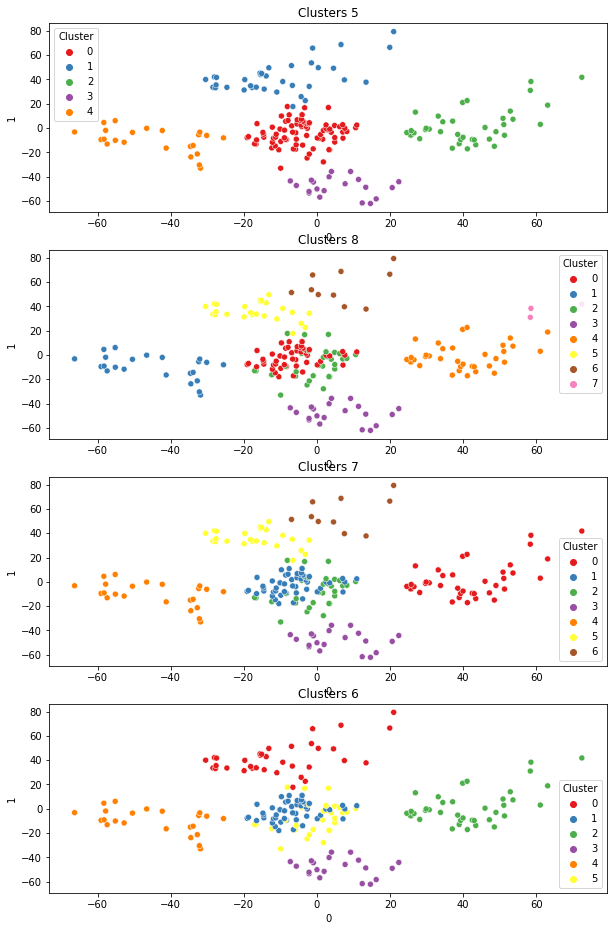

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))

model_name = []
silhouettes = []
calinskies = []


for i in range(5, 9):
    model_agg = AgglomerativeClustering(n_clusters=i)
    model_agg.fit(df_dum)
    model_name.append(f"Agg {i}")

    silhouette = silhouette_score(df_dum, model_agg.labels_)
    silhouettes.append(silhouette)
    calinski = calinski_harabasz_score(df_dum, model_agg.labels_)
    calinskies.append(calinski)

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_dum)

    data = pd.DataFrame(df_pca)
    data['Cluster'] = model_agg.labels_

    sns.scatterplot(data=data, x=0, y=1, hue='Cluster', palette='Set1', ax = axes[(5-i)])
    
    axes[(5-i)].set_title(f'Clusters {i}')

In [28]:
result_3 = pd.DataFrame({'name': model_name,
                       'calin': calinskies,
                       'silh': silhouettes})
result_3

,name,calin,silh
0,Agg 5,147.579723,0.439975
1,Agg 6,159.328629,0.442801
2,Agg 7,152.802061,0.425939
3,Agg 8,148.422345,0.422330


### Модель з 6 кластерами впоралася найкраще

# -----------------------------+------------------------------

# -----------------------------+------------------------------

# -----------------------------+------------------------------

# Висновок: модель к-середніх з 6 кластерами впоралася найкраще. 

In [31]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_dum)

print("Центроїди:", kmeans.cluster_centers_)

Центроїди: [[32.69230769 86.53846154 82.12820513  0.46153846]
 [41.68571429 88.22857143 17.28571429  0.57142857]
 [56.15555556 53.37777778 49.08888889  0.44444444]
 [25.27272727 25.72727273 79.36363636  0.40909091]
 [44.14285714 25.14285714 19.52380952  0.38095238]
 [27.         56.65789474 49.13157895  0.34210526]]


In [42]:
result = df_dum
result['Cluster'] = kmeans.labels_

In [58]:
for i in range(0, 5):
    print('----------------+----------------')
    group = result[result['Cluster'] == i]
    print(group.describe().loc[['min', 'max', 'mean']])

----------------+----------------
            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
min   27.000000           69.000000               63.000000     0.000000   
max   40.000000          137.000000               97.000000     1.000000   
mean  32.692308           86.538462               82.128205     0.461538   

      Cluster  
min       0.0  
max       0.0  
mean      0.0  
----------------+----------------
            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
min   19.000000           71.000000                1.000000     0.000000   
max   59.000000          137.000000               39.000000     1.000000   
mean  41.685714           88.228571               17.285714     0.571429   

      Cluster  
min       1.0  
max       1.0  
mean      1.0  
----------------+----------------
            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
min   43.000000           38.000000               35.000000     0.000000   
max   70

## 